# Multiple group boxplots (antibody titer)

This produces the 1st panel in Figure 7E in Li et al. (2017) Metabolic Phenotypes of Response to Vaccination in Humans. Cell 169(5): p862-877 (https://www.cell.com/cell/fulltext/S0092-8674(17)30477-4).

Objective: boxplot of multiple groups of antibody levels

Environment: Python 2.x

Technical level: beginner

In [1]:
# necessary libraries
# https://seaborn.pydata.org/examples/grouped_boxplot.html
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# We have study participants in this list
subjects = ['ZV101', 'ZV104', 'ZV105', 'ZV106', 'ZV108', 'ZV109', 'ZV110', 'ZV111', 'ZV112', 
            'ZV113', 'ZV114', 'ZV115', 'ZV116', 'ZV117', 'ZV118', 'ZV119', 'ZV120', 'ZV121', 
            'ZV122', 'ZV125', 'ZV126', 'ZV127', 'ZV129', 'ZV131', 'ZV132', 'ZV133', 'ZV134', 
            'ZV135', 'ZV136', 'ZV137', 'ZV138', 'ZV139', 'ZV142', 'ZV143', 'ZV144', 'ZV201', 
            'ZV202', 'ZV203', 'ZV204', 'ZV205', 'ZV206', 'ZV207', 'ZV208', 'ZV209', 'ZV210', 
            'ZV211', 'ZV212', 'ZV214', 'ZV215', 'ZV216', 'ZV217', 'ZV219', 'ZV220', 'ZV221', 
            'ZV222', 'ZV223', 'ZV224', 'ZV225', 'ZV226', 'ZV227', 'ZV228', 'ZV230', 'ZV231', 
            'ZV232', 'ZV233', 'ZV234', 'ZV235', 'ZV236', 'ZV238', 'ZV239']

# Corresponding IgG titer (Day 28 subtracted by day 0 at log2 scale):
IgG_Day28v0 = [1.88460491732, 0.393171539534, -0.168907116013, 0.939257119928, 0.886717687742, 
               0.222364462621, 1.19763615237, 1.10278228483, 0.762558479123, 0.482859517764, 
               3.06895125823, 2.65547089634, 3.1246102699, 0.0817177637889, 0.0863458728906, 
               0.576659453171, -0.112593136382, -0.41399468905, 1.534434276, 0.417979369872, 
               0.501312407387, 0.810411941305, 1.03285943748, 2.36204892011, 0.459069981942, 
               0.589035393388, 0.70982310786, 3.04982788067, 0.365258566978, 0.156323789053, 
               0.647347688162, 2.57909359242, 1.35619598841, 0.368019897579, -0.00211517647641, 
               1.70578283326, 2.48140637708, 1.79136589616, 1.07890113923, 1.55496796103, 
               3.12499162421, 1.81909767254, 1.68716668192, 1.19121959751, 2.19136114085, 
               1.5867873674, 2.46249809377, 0.635758145608, 1.05578351485, 0.200076341051, 
               0.0857081983748, 1.94310030119, 2.79642741953, 1.14694806161, 0.168368002037, 
               1.95068464235, 1.75815855425, -0.0491694667867, 1.85025329628, 0.716745898002, 
               1.32365729525, 3.06310377471, 0.0355897186401, 1.56863810549, 1.54389213762, 
               0.269361386001, 0.50249119686, 0.649964910476, 1.96095309149, 0.196382368394]

# make a dictionary of data - the two lists must be matched order
mydata = dict(zip(subjects, IgG_Day28v0))
print(mydata)

{'ZV226': 1.85025329628, 'ZV204': 1.07890113923, 'ZV144': -0.00211517647641, 'ZV202': 2.48140637708, 'ZV132': 0.459069981942, 'ZV234': 0.269361386001, 'ZV233': 1.54389213762, 'ZV206': 3.12499162421, 'ZV232': 1.56863810549, 'ZV219': 1.94310030119, 'ZV230': 3.06310377471, 'ZV231': 0.0355897186401, 'ZV236': 0.649964910476, 'ZV227': 0.716745898002, 'ZV235': 0.50249119686, 'ZV210': 2.19136114085, 'ZV211': 1.5867873674, 'ZV212': 2.46249809377, 'ZV238': 1.96095309149, 'ZV214': 0.635758145608, 'ZV215': 1.05578351485, 'ZV216': 0.200076341051, 'ZV217': 0.0857081983748, 'ZV119': 0.576659453171, 'ZV118': 0.0863458728906, 'ZV139': 2.57909359242, 'ZV138': 0.647347688162, 'ZV113': 0.482859517764, 'ZV112': 0.762558479123, 'ZV111': 1.10278228483, 'ZV110': 1.19763615237, 'ZV117': 0.0817177637889, 'ZV116': 3.1246102699, 'ZV115': 2.65547089634, 'ZV114': 3.06895125823, 'ZV221': 1.14694806161, 'ZV203': 1.79136589616, 'ZV220': 2.79642741953, 'ZV239': 0.196382368394, 'ZV223': 1.95068464235, 'ZV135': 3.0498278

In [3]:
# Define the 5 groups of subjects
(L1, L2, L3, H4, H5) = (['ZV205', 'ZV143', 'ZV204', 'ZV223', 'ZV209'], 
    ['ZV135', 'ZV219', 'ZV232', 'ZV227', 'ZV228', 'ZV142', 'ZV210', 'ZV234', 'ZV216', 'ZV137', 'ZV222', 'ZV231', 'ZV136', 'ZV233', 'ZV134', 'ZV144', 'ZV238', 'ZV217', 'ZV131', 'ZV138', 'ZV126', 'ZV206', 'ZV201', 'ZV215'], 
    ['ZV224', 'ZV226', 'ZV202', 'ZV236', 'ZV220', 'ZV225', 'ZV203', 'ZV208', 'ZV221'], 
    ['ZV212', 'ZV127', 'ZV211', 'ZV139', 'ZV207', 'ZV235'], 
    ['ZV214', 'ZV122', 'ZV230', 'ZV239', 'ZV103', 'ZV128', 'ZV117', 'ZV113', 'ZV133', 'ZV120', 'ZV101', 'ZV104', 'ZV129', 'ZV105', 'ZV108', 'ZV114', 'ZV111', 'ZV118', 'ZV121', 'ZV106', 'ZV109', 'ZV116', 'ZV110', 'ZV115', 'ZV112', 'ZV125', 'ZV119', 'ZV132'],
                       )

# Retrieve data per group
data_to_plot = []
for G in (L1, L2, L3, H4, H5): 
    new = []
    for j in G:
        if mydata.has_key(j):
            new.append(mydata[j])
    data_to_plot.append(new)

print(data_to_plot)

[[1.55496796103, 0.368019897579, 1.07890113923, 1.95068464235, 1.19121959751], [3.04982788067, 1.94310030119, 1.56863810549, 0.716745898002, 1.32365729525, 1.35619598841, 2.19136114085, 0.269361386001, 0.200076341051, 0.156323789053, 0.168368002037, 0.0355897186401, 0.365258566978, 1.54389213762, 0.70982310786, -0.00211517647641, 1.96095309149, 0.0857081983748, 2.36204892011, 0.647347688162, 0.501312407387, 3.12499162421, 1.70578283326, 1.05578351485], [1.75815855425, 1.85025329628, 2.48140637708, 0.649964910476, 2.79642741953, -0.0491694667867, 1.79136589616, 1.68716668192, 1.14694806161], [2.46249809377, 0.810411941305, 1.5867873674, 2.57909359242, 1.81909767254, 0.50249119686], [0.635758145608, 1.534434276, 3.06310377471, 0.196382368394, 0.0817177637889, 0.482859517764, 0.589035393388, -0.112593136382, 1.88460491732, 0.393171539534, 1.03285943748, -0.168907116013, 0.886717687742, 3.06895125823, 1.10278228483, 0.0863458728906, -0.41399468905, 0.939257119928, 0.222364462621, 3.1246102

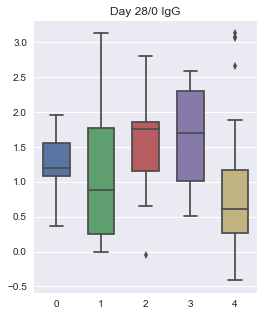

In [4]:
# Do boxplot using seaborn
fig = plt.figure(figsize=(4, 5))
sns.boxplot(data=data_to_plot, width=0.6)
plt.title("Day 28/0 IgG")
#to save figure in PDF: plt.savefig("Fig7E1.pdf", dpi=300)
plt.show()